# [Rotten Tomatoes Top Movies]

In [11]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import PIL.Image as Image

In [12]:
movies = pd.read_csv('rotten_tomatoes_top_movies_2019-01-15.csv')

In [13]:
movies


Rank                      Title  RatingTomatometer  No. of Reviews  \
0        1       Black Panther (2018)                 97             444   
1        2  Mad Max: Fury Road (2015)                 97             394   
2        3        Wonder Woman (2017)                 93             410   
3        4          Metropolis (1927)                 99             118   
4        5                Coco (2017)                 97             308   
...    ...                        ...                ...             ...   
1585    70              Priest (2011)                 15              97   
1586    71    American Outlaws (2001)                 14             103   
1587    72      September Dawn (2007)                 15              54   
1588    73           Jonah Hex (2010)                 12             147   
1589    74       Texas Rangers (2001)                  2              51   

                Genres  
0     action|adventure  
1     action|adventure  
2     action|adventure  
3     action|adventure  
4     action|adventure  
...                ...  
1585           western  
1586           western  
1587           western  
1588           western  
1589           western  

[1590 rows x 5 columns]

In [14]:
nsamples = 50
downSampleMask = np.random.choice(range(len(movies)-1), nsamples, replace=False)
downSampleMask

array([1404,  501, 1182,  216, 1512,  836,  408, 1096, 1073, 1362,  783,
        610,  483, 1258, 1482,  517,  672,  337, 1401,  528,  622, 1332,
        771,  486, 1361,  981,  850, 1246,  269, 1172, 1393, 1356,  252,
        379,  161,  776,  555,  852,   36, 1195,  321,  742,  361,  124,
         32,  956,  768,  633, 1075, 1127])

### I will do the work for you and filter only 50 movies randomly, since 1000 is such a large number! 

In [15]:
moviesDS = movies.loc[downSampleMask]
moviesDS

Rank                                             Title  \
1404     5                                      Rocky (1976)   
501      2                        I Am Not Your Negro (2017)   
1182    83                               The Graduate (1967)   
216     17                        Au Hasard Balthazar (1966)   
1512    50                            Man of the Year (2006)   
836     37                              Spirited Away (2002)   
408      9                        Singin' in the Rain (1952)   
1096    97                            Children of Men (2006)   
1073    74                                 Ex Machina (2015)   
1362    63                       Finding Vivian Maier (2014)   
783     84                                The Descent (2006)   
610     11                                    Dunkirk (2017)   
483     84                                The Muppets (2011)   
1258    59               Ghostbusters (1984 Original) (1984)   
1482    20                                 F for Fake (1974)   
517     18                                     Weiner (2016)   
672     73                            The Hurt Locker (2009)   
337     38                                   Rashômon (1951)   
1401     2                                Hoop Dreams (1994)   
528     29                                Hoop Dreams (1994)   
622     23                         The Maltese Falcon (1941)   
1332    33                   Elaine Stritch: Shoot Me (2014)   
771     72                                The Shining (1980)   
486     87                                   Repo Man (1984)   
1361    62                                     Marley (2012)   
981     82                                 F for Fake (1974)   
850     51                                     Frozen (2013)   
1246    47                      It's a Wonderful Life (1946)   
269     70  Three Colors: Blue (Trois Couleurs: Bleu) (1993)   
1172    73                        Million Dollar Baby (2004)   
1393    94                                  The Arbor (2011)   
1356    57                            No End in Sight (2007)   
252     53                                   Timbuktu (2015)   
379     80                                 Goldfinger (1964)   
161     62                               A Bug's Life (1998)   
776     77                          The Devil's Candy (2017)   
555     56                                       13th (2016)   
852     53                                   Coraline (2009)   
36      37                   Kubo and the Two Strings (2016)   
1195    96                                Crazy Heart (2009)   
321     22                                Rear Window (1954)   
742     43                                   Suspiria (1977)   
361     62                                City Lights (1931)   
124     25                       Beauty and the Beast (1991)   
32      33                                     WALL-E (2008)   
956     57    Marina Abramovic: The Artist Is Present (2012)   
768     69                              The Dead Zone (1983)   
633     34                                      Alien (1979)   
1075    76                              Jurassic Park (1993)   
1127    28  Three Colors: Red (Trois couleurs: Rouge) (1994)   

      RatingTomatometer  No. of Reviews                   Genres  
1404                 93              57           sports|fitness  
501                  98             192              documentary  
1182                 89              75                  romance  
216                 100              40  art_house|international  
1512                 22             143               television  
836                  97             183              kids|family  
408                 100              50                   comedy  
1096                 92             244         mystery|suspense  
1073                 92             251         mystery|suspense  
1362                 95              96         special_interest  
783 

In [16]:
moviesDS_heatmap= pd.pivot_table(moviesDS, index = ['RatingTomatometer'], values = ['No. of Reviews'], columns = ['Title'], aggfunc=np.sum)

In [17]:
names = moviesDS_heatmap.columns.levels[1].to_list()

In [18]:
names

['13th (2016)',
 "A Bug's Life (1998)",
 'Alien (1979)',
 'Au Hasard Balthazar (1966)',
 'Beauty and the Beast (1991)',
 'Children of Men (2006)',
 'City Lights (1931)',
 'Coraline (2009)',
 'Crazy Heart (2009)',
 'Dunkirk (2017)',
 'Elaine Stritch: Shoot Me (2014)',
 'Ex Machina (2015)',
 'F for Fake (1974)',
 'Finding Vivian Maier (2014)',
 'Frozen (2013)',
 'Ghostbusters (1984 Original) (1984)',
 'Goldfinger (1964)',
 'Hoop Dreams (1994)',
 'I Am Not Your Negro (2017)',
 "It's a Wonderful Life (1946)",
 'Jurassic Park (1993)',
 'Kubo and the Two Strings (2016)',
 'Man of the Year (2006)',
 'Marina Abramovic: The Artist Is Present (2012)',
 'Marley (2012)',
 'Million Dollar Baby (2004)',
 'No End in Sight (2007)',
 'Rashômon (1951)',
 'Rear Window (1954)',
 'Repo Man (1984)',
 'Rocky (1976)',
 "Singin' in the Rain (1952)",
 'Spirited Away (2002)',
 'Suspiria (1977)',
 'The Arbor (2011)',
 'The Dead Zone (1983)',
 'The Descent (2006)',
 "The Devil's Candy (2017)",
 'The Graduate (1967

### Yay! There are names of 50 top-rated movies by Rotten Tomatoes

In [19]:
im1 = Image.open("Beauty and the Beast 1991.jpg")

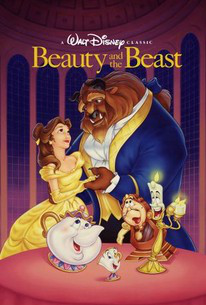

In [20]:
im1

In [21]:
im2 = Image.open("frozen 2013.jpeg")

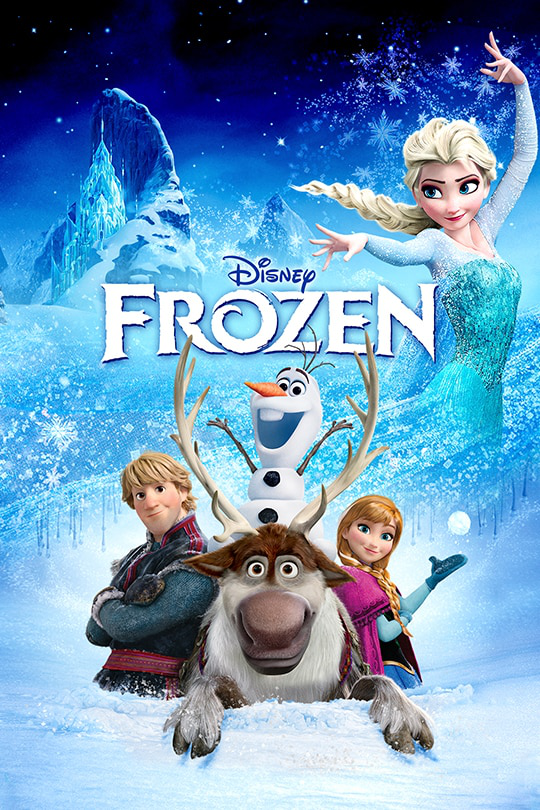

In [22]:
im2

### Here are some examples of listed movies. Everyone's favorite, rights?

#### Now, let's see a heatmap showing the relationship between the rating and the names of the movies. Additionally, you can see the total number of reviews when you click each box! 

In [23]:
# 2. Scales
col_sc = bqplot.ColorScale(scheme = "BuPu")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis 
c_ax = bqplot.ColorAxis(scale = col_sc,orientation = 'vertical', side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label = 'Title', label_offset = '100px',
                   tick_rotate=45,
                   tick_style= {'front-size' : '3px','tick_offset' : '100px',
                                 'text-anchor' : 'top'})
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical',label = 'RatingTomatometer')
                        
# 4. Marks
heat_map = bqplot.GridHeatMap (color = np.log10(moviesDS_heatmap.values), 
                               row = moviesDS_heatmap.index,
                               column = names,
                               scales = {'color' : col_sc,
                                         'row' : y_sc,
                                         'column' : x_sc},
                               interactions = {'click': 'select'}, # select on click
                              anchor_style = {'fill':'blue'},  # fill selection with blue
                              selected_style = {'opacity': 1.0}, #opaque on selection
                              unselected_style = {'opacity': 0.5}) # see-through for non-select

# Interactions -- first ading a label
mySelectedLabel = ipywidgets.Label()

def on_selection(change):
    if len(change['owner'].selected) == 1: # allwoing only 1 selection
        a,b = change['owner'].selected[0]
        v = np.log10(moviesDS_heatmap.values)[a,b] #grab data value
        mySelectedLabel.value = 'No. of Reviews =' + str(v) # set label
        
#2. linking of the heatmap traits with this function
heat_map.observe(on_selection, 'selected')


fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox ([mySelectedLabel, fig])
myDashboard

#### Additionally, let's see the relationship between the number of reviews and the Rotten Tomato Rating. Do you think there are any connections? 

In [24]:
moviesDS

Rank                                             Title  \
1404     5                                      Rocky (1976)   
501      2                        I Am Not Your Negro (2017)   
1182    83                               The Graduate (1967)   
216     17                        Au Hasard Balthazar (1966)   
1512    50                            Man of the Year (2006)   
836     37                              Spirited Away (2002)   
408      9                        Singin' in the Rain (1952)   
1096    97                            Children of Men (2006)   
1073    74                                 Ex Machina (2015)   
1362    63                       Finding Vivian Maier (2014)   
783     84                                The Descent (2006)   
610     11                                    Dunkirk (2017)   
483     84                                The Muppets (2011)   
1258    59               Ghostbusters (1984 Original) (1984)   
1482    20                                 F for Fake (1974)   
517     18                                     Weiner (2016)   
672     73                            The Hurt Locker (2009)   
337     38                                   Rashômon (1951)   
1401     2                                Hoop Dreams (1994)   
528     29                                Hoop Dreams (1994)   
622     23                         The Maltese Falcon (1941)   
1332    33                   Elaine Stritch: Shoot Me (2014)   
771     72                                The Shining (1980)   
486     87                                   Repo Man (1984)   
1361    62                                     Marley (2012)   
981     82                                 F for Fake (1974)   
850     51                                     Frozen (2013)   
1246    47                      It's a Wonderful Life (1946)   
269     70  Three Colors: Blue (Trois Couleurs: Bleu) (1993)   
1172    73                        Million Dollar Baby (2004)   
1393    94                                  The Arbor (2011)   
1356    57                            No End in Sight (2007)   
252     53                                   Timbuktu (2015)   
379     80                                 Goldfinger (1964)   
161     62                               A Bug's Life (1998)   
776     77                          The Devil's Candy (2017)   
555     56                                       13th (2016)   
852     53                                   Coraline (2009)   
36      37                   Kubo and the Two Strings (2016)   
1195    96                                Crazy Heart (2009)   
321     22                                Rear Window (1954)   
742     43                                   Suspiria (1977)   
361     62                                City Lights (1931)   
124     25                       Beauty and the Beast (1991)   
32      33                                     WALL-E (2008)   
956     57    Marina Abramovic: The Artist Is Present (2012)   
768     69                              The Dead Zone (1983)   
633     34                                      Alien (1979)   
1075    76                              Jurassic Park (1993)   
1127    28  Three Colors: Red (Trois couleurs: Rouge) (1994)   

      RatingTomatometer  No. of Reviews                   Genres  
1404                 93              57           sports|fitness  
501                  98             192              documentary  
1182                 89              75                  romance  
216                 100              40  art_house|international  
1512                 22             143               television  
836                  97             183              kids|family  
408                 100              50                   comedy  
1096                 92             244         mystery|suspense  
1073                 92             251         mystery|suspense  
1362                 95              96         special_interest  
783 

In [25]:
moviesDS.groupby('RatingTomatometer')['No. of Reviews'].sum()

RatingTomatometer
22      143
85      173
86       73
88      100
89       75
90      741
91      434
92      993
93      185
94      113
95      422
96      600
97     1000
98      667
100     259
Name: No. of Reviews, dtype: int64

In [26]:
m= moviesDS.groupby('RatingTomatometer')['RatingTomatometer']
type(moviesDS['RatingTomatometer'])

pandas.core.series.Series

In [27]:
tomato = np.unique(movies['RatingTomatometer'])
tomato

array([  2,   5,  10,  12,  13,  14,  15,  16,  17,  21,  22,  28,  29,
        30,  31,  32,  33,  35,  36,  40,  41,  43,  45,  48,  49,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  66,  69,
        70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100], dtype=int64)

In [28]:
# 1. Data
#year = buildings['Year Acquired'].unique()
total_No_of_Reviews = moviesDS.groupby('RatingTomatometer')['No. of Reviews'].sum()

#2. Scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

#3. Axes
ax_x = bqplot.Axis(scale = x_sc, label='RatingTomatometer')
ax_y = bqplot.Axis(scale = y_sc, label='No. of Reviews', orientation= 'vertical')

#4. Marks
lines = bqplot.Lines(x=total_No_of_Reviews.index, y=total_No_of_Reviews.values, scales={'x':x_sc, 'y':y_sc})


#5. Figure
line_fig = bqplot.Figure(marks =[lines], axes= [ax_x, ax_y])
line_fig


Figure(axes=[Axis(label='RatingTomatometer', scale=LinearScale()), Axis(label='No. of Reviews', orientation='v…